In [1]:
import os
import numpy as np
import datetime as dt
from psaw import PushshiftAPI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
api = PushshiftAPI()
start=int(dt.datetime(2020,1,1).timestamp())
end=int(dt.datetime(2021,1,25).timestamp())

query = 'GME|Gamestop'

results = list(api.search_submissions(
                            after=start,
                            before=end,
                            q=query,
                            subreddit='wallstreetbets',
                            filter=['author', 'title', 'id', 'score', 'created_utc', 'num_comments']))
df = pd.DataFrame(results).drop('d_', axis=1)
file_path = 'wallstreetbets.csv'
df['created_on'] = pd.to_datetime(df['created_utc'], unit='s')
df['created_on'] = df['created_on'].astype({'created_on': 'datetime64[ns]'})
df.to_csv(file_path, index=False)


In [17]:
submissions = pd.read_csv('wallstreetbets.csv')

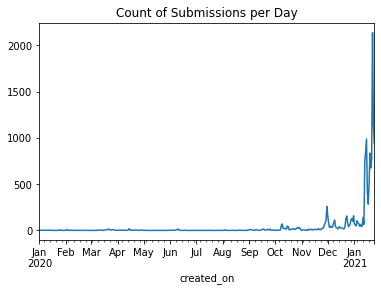

In [19]:
submissions['created_on'] = submissions['created_on'].astype({'created_on': 'datetime64[ns]'})
date_bins = submissions.resample('D', on='created_on').count()
date_bins['author'].plot()
plt.title('Count of Submissions per Day')
plt.show()

In [20]:
submission_total = len(submissions)
print(f'Submissions total: {submission_total}')
unique_authors = len(submissions['author'].unique())
print(f'Unique authors: {unique_authors}')

Submissions total: 15014
Unique authors: 9509


In [21]:
# Unique authors under each week
unique_authors = submissions.resample('W', on='created_on').nunique()

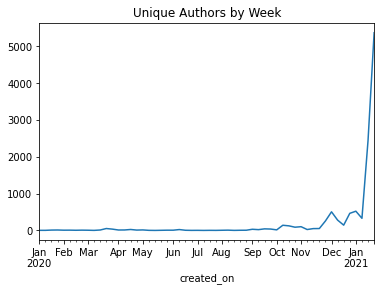

In [22]:
unique_authors['author'].plot()
plt.title('Unique Authors by Week')
plt.show()

# Search Comments

In [40]:
api = PushshiftAPI()
start=int(dt.datetime(2020,1,1).timestamp())
end=int(dt.datetime(2021,1,25).timestamp())
link_ids = list(submissions[submissions['num_comments'] > 0]['id'])
comments = []
N = 50
step = int(len(link_ids)/N) #split into N calls
for i in tqdm(range(N), position=0):
    ids = link_ids[int(round(i*step)):int(round((i+1)*step))]
    results = list(api.search_comments(
                            after=start,
                            before=end,
                            subreddit='wallstreetbets',
                            link_id=ids,
                            filter=['id', 'score', 'created_utc', 'author', 'parent_id']))
    comments.append(results)

comments_df = pd.DataFrame(comments)
comments_df.to_csv('wallstreetbets_comments.csv', index=False)

100%|██████████| 50/50 [4:41:24<00:00, 337.70s/it]


In [43]:
second_comment_df = pd.DataFrame(comments, columns=['id', 'score', 'created_utc', 'author', 'parent_id'])

ValueError: 5 columns passed, passed data had 109143 columns

In [60]:
second_comments_df = pd.DataFrame(columns=['id', 'score', 'created_utc', 'author', 'parent_id', 'd_'])
for c in comments:
    second_comments_df = second_comments_df.append(c)

In [62]:
second_comments_df.drop('d_', inplace=True, axis=1)

In [63]:
second_comments_df

,id,score,created_utc,author,parent_id,created
0,gkjkq9i,82,1611489991,skinfather11216,t3_l3y4mp,1.611486e+09
1,gkjkjmx,9,1611489944,DivingDeep21,t1_gkjja9s,1.611486e+09
2,gkjkiyd,28,1611489939,je_veux_sentir,t1_gkjjk3k,1.611486e+09
3,gkjkiki,18,1611489936,BlazingLeo,t1_gkjjk3k,1.611486e+09
4,gkjkdnm,11,1611489901,Anon-1400secret,t1_gkjjzr8,1.611486e+09
...,...,...,...,...,...,...
6984,fkno02h,1,1584370199,XOMEOWPANTS,t3_fjm3xy,1.584367e+09
6985,fknnzk9,1,1584370190,believe0101,t3_fjm3xy,1.584367e+09
6986,fknnzir,1,1584370189,thesmallerman,t3_fjm3xy,1.584367e+09
6987,fknnzb1,1,1584370185,ElderSith,t3_fjm3xy,1.584367e+09


In [65]:
second_comments_df.to_csv('wallstreetbets_sub_comments.csv', index=False)

In [66]:
len(second_comments_df)

539600

In [67]:
comment_test = pd.read_csv('wallstreetbets_sub_comments.csv')

In [68]:
len(comment_test)

539600

In [71]:
comment_test

,id,score,created_utc,author,parent_id,created
0,gkjkq9i,82,1611489991,skinfather11216,t3_l3y4mp,1.611486e+09
1,gkjkjmx,9,1611489944,DivingDeep21,t1_gkjja9s,1.611486e+09
2,gkjkiyd,28,1611489939,je_veux_sentir,t1_gkjjk3k,1.611486e+09
3,gkjkiki,18,1611489936,BlazingLeo,t1_gkjjk3k,1.611486e+09
4,gkjkdnm,11,1611489901,Anon-1400secret,t1_gkjjzr8,1.611486e+09
...,...,...,...,...,...,...
539595,fkno02h,1,1584370199,XOMEOWPANTS,t3_fjm3xy,1.584367e+09
539596,fknnzk9,1,1584370190,believe0101,t3_fjm3xy,1.584367e+09
539597,fknnzir,1,1584370189,thesmallerman,t3_fjm3xy,1.584367e+09
539598,fknnzb1,1,1584370185,ElderSith,t3_fjm3xy,1.584367e+09
